In [1]:
pip install mediapipe

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import mediapipe as mp
from PIL import Image
import numpy as np
import time

time_start = time.time()

img_path = "C:/Users/n1201023.STCN2/Downloads/12.jpg"

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For static images:
with mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,
    min_detection_confidence=0.5) as hands:
    
    image = cv2.imread(img_path)
    image=cv2.resize(image, dsize=(480,320))
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    landmarks=results.multi_hand_landmarks[0].landmark
    
    posx=[landmark.x*image_width for landmark in landmarks]
    posy=[landmark.y*image_height for landmark in landmarks]

# 時間計測終了
time_end = time.time()
# 経過時間（秒）
time_past = time_end- time_start
print(time_past)

0.32686281204223633


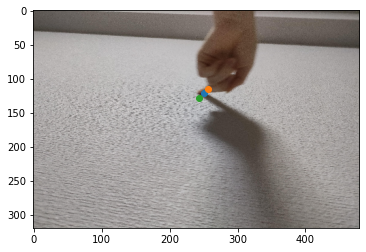

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(posx[8],posy[8])
plt.scatter(posx[7],posy[7])
plt.scatter(posx[8]*2-posx[7],posy[8]*2-posy[7])

plt.imshow(np.array(image[:, :, ::-1]))

In [8]:
posx[8]*2-posy[7]

384.74907875061035

In [21]:
B,G,R=image[int(posy[8]*2-posy[7]),int(posx[8]*2-posx[7]),:]

array([189, 187, 187], dtype=uint8)

In [65]:
import glob
image_paths=glob.glob('C:/Users/n1201023.STCN2/Pictures/ex/*.jpg')
pos_lst=[]
for path in image_paths:
    mp_drawing = mp.solutions.drawing_utils
    mp_drawing_styles = mp.solutions.drawing_styles
    mp_hands = mp.solutions.hands

    # For static images:
    with mp_hands.Hands(
        static_image_mode=True,
        max_num_hands=1,
        min_detection_confidence=0.5) as hands:

        image = cv2.imread(path)
        image_height, image_width, _ = image.shape
        # Convert the BGR image to RGB before processing.
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if results.multi_hand_landmarks is not None:        
            landmarks=results.multi_hand_landmarks[0].landmark

            posx=[landmark.x*image_width for landmark in landmarks]
            posy=[landmark.y*image_height for landmark in landmarks]
            
            pos_lst.append([posx[8],posy[8]])
        else:
            pos_lst.append([])

In [66]:
print(pos_lst)

[[], [], [], [113.40328216552734, 60.037193298339844], [74.32002067565918, 72.23108768463135], [59.85588550567627, 72.90796279907227], [102.73995399475098, 74.34314489364624], [55.620689392089844, 80.30933618545532], [79.61500644683838, 75.32661437988281], [], [], [140.48097610473633, 97.67212629318237], [180.19189834594727, 109.00647640228271], [192.9990005493164, 111.36212825775146], [196.412353515625, 114.98598575592041], [211.25810623168945, 135.064058303833], [215.5984878540039, 141.51052951812744], [226.37012481689453, 145.02857208251953], [], [123.26148986816406, 142.6644515991211], [], [134.4984531402588, 128.73530387878418], [120.32573699951172, 126.35069847106934], [28.444385528564453, 128.43934535980225], [68.29267024993896, 127.22542762756348], [], [163.69421005249023, 125.90795516967773], [189.6390151977539, 126.9766616821289], [], [134.60615158081055, 119.89748954772949], [43.80934715270996, 144.69820976257324], [33.201026916503906, 160.2193021774292], [23.6020565032959, 

In [38]:
image = cv2.flip(cv2.imread(img_path), 1)
print(image)

None


<ipython-input-67-f5b80e05fbd0>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


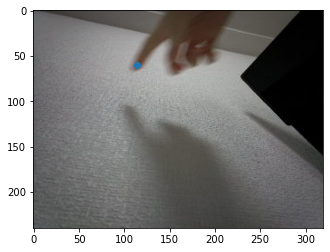

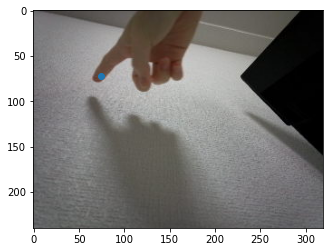

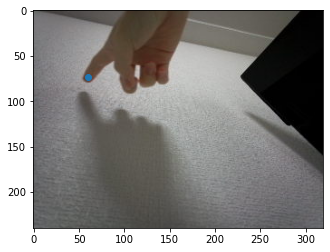

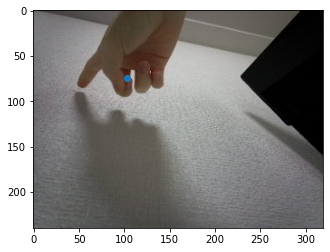

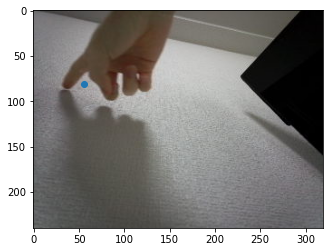

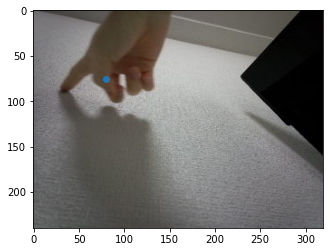

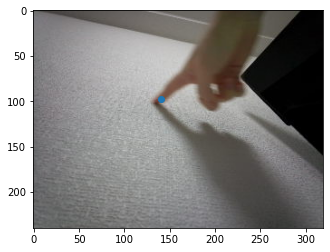

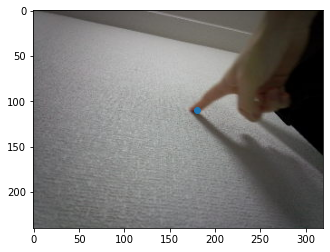

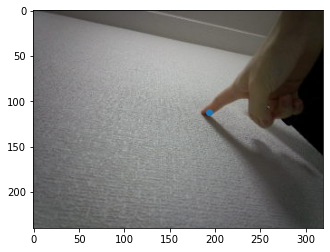

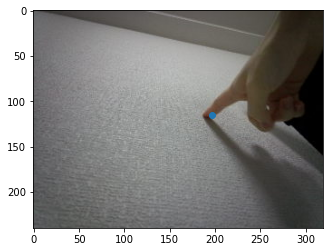

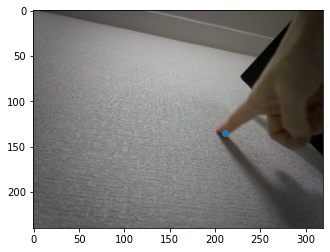

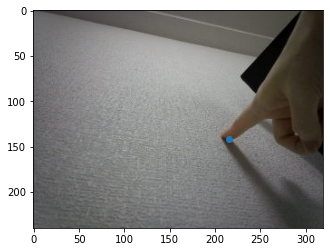

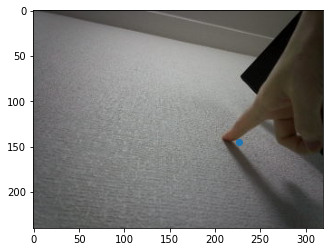

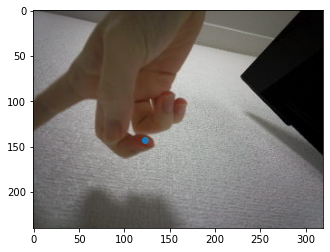

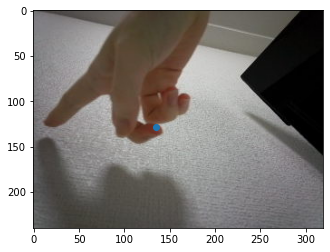

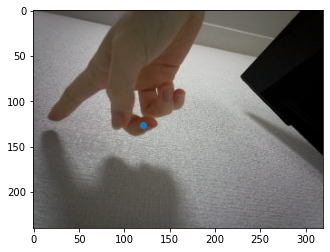

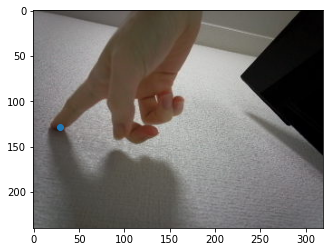

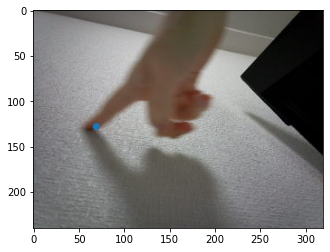

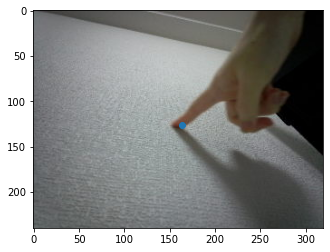

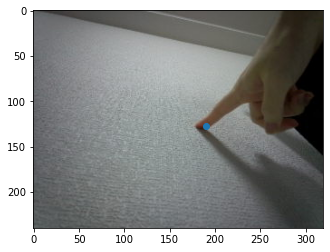

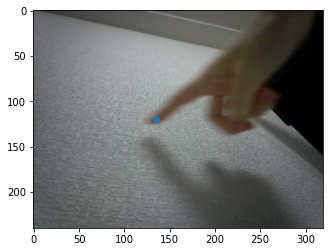

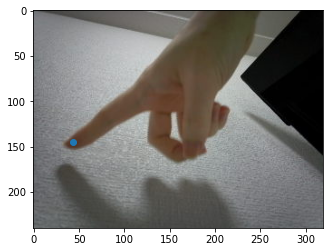

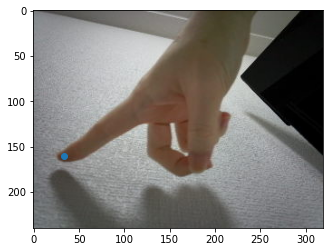

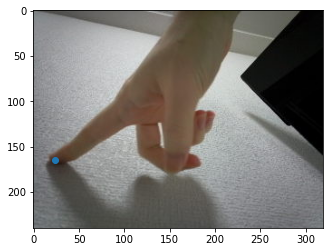

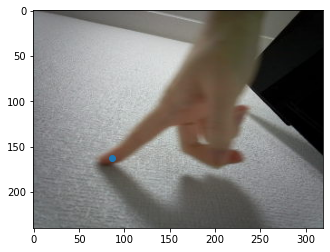

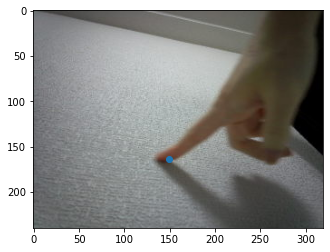

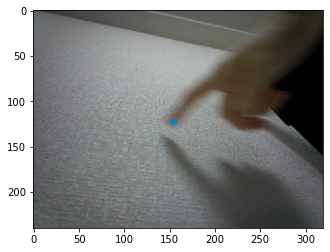

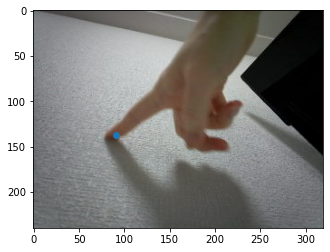

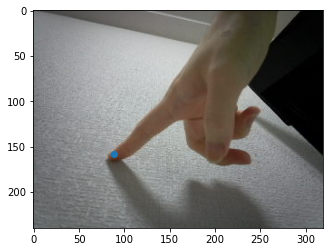

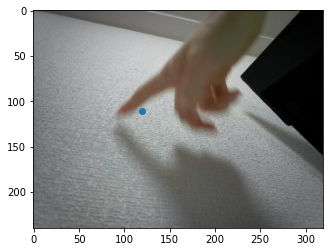

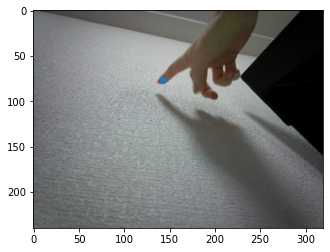

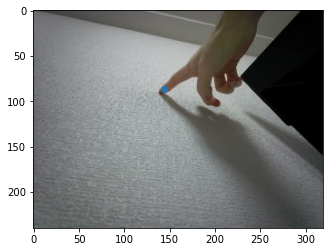

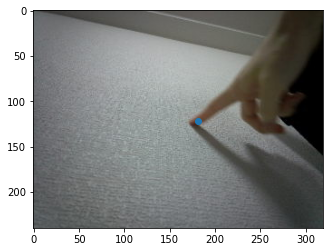

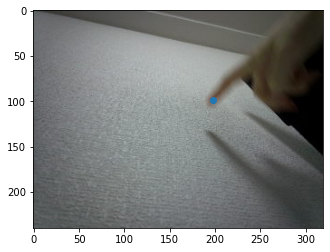

In [67]:
for path,pos in zip(image_paths,pos_lst):
    image = cv2.imread(path)
    if len(pos)!=0:
        plt.figure()        
        plt.scatter(pos[0],pos[1])
        plt.imshow(np.array(image[:, :, ::-1]))
